In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [2]:
weather = pd.read_csv('day.csv', parse_dates=['dteday'])
weather.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
bike_share = pd.read_csv('2011-Q1-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])
bike_share.head()

,Duration,Start date,End date,Start station,End station,Bike#,Member Type
0,0h 1min. 50sec.,2011-03-31 23:58:00,2011-04-01 00:00:00,14th & Harvard St NW (31105),16th & Harvard St NW (31103),W00749,Registered
1,0h 16min. 21sec.,2011-03-31 23:52:00,2011-04-01 00:08:00,19th & L St NW (31224),7th & Water St SW / SW Waterfront (31609),W01048,Casual
2,0h 3min. 19sec.,2011-03-31 23:47:00,2011-03-31 23:50:00,Lincoln Park / 13th & East Capitol St NE (31619),13th & H St NE (31611),W00340,Registered
3,0h 5min. 44sec.,2011-03-31 23:45:00,2011-03-31 23:50:00,14th & R St NW (31202),Massachusetts Ave & Dupont Circle NW (31200),W00981,Registered
4,0h 8min. 42sec.,2011-03-31 23:34:00,2011-03-31 23:43:00,Park Rd & Holmead Pl NW (31602),15th & P St NW (31201),W00449,Registered


In [10]:
bike_share.drop('Bike#', 1, inplace=True)

In [11]:
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))

In [12]:
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))

In [13]:
bike_share[['Hours', 'Minutes']] = bike_share['Duration'].str.split(' ', 1, expand=True)
bike_share[['Minutes', 'Seconds']] = bike_share['Minutes'].str.split(' ', 1, expand=True)
bike_share['Hours'] = bike_share['Hours'].str.replace('h', '')
bike_share['Minutes'] = bike_share['Minutes'].str.replace('min.', '')
bike_share['Seconds'] = bike_share['Seconds'].str.replace('sec.', '')
bike_share['Hours'] = bike_share['Hours'].astype(int)
bike_share['Minutes'] = bike_share['Minutes'].astype(int)
bike_share['Seconds'] = bike_share['Seconds'].astype(int)
bike_share['time_diff'] = 60 * bike_share['Hours'] + bike_share['Minutes'] + np.round(bike_share['Seconds']/60, 3)

In [14]:
bike_share.drop('Hours', 1, inplace=True)
bike_share.drop('Minutes', 1, inplace=True)
bike_share.drop('Seconds', 1, inplace=True)

In [15]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150071 entries, 0 to 150070
Data columns (total 9 columns):
Duration            150071 non-null object
Start date          150071 non-null datetime64[ns]
End date            150071 non-null datetime64[ns]
Start station       150071 non-null object
End station         150060 non-null object
Member Type         150071 non-null object
start_date_short    150071 non-null datetime64[ns]
end_date_short      150071 non-null datetime64[ns]
time_diff           150071 non-null float64
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 10.3+ MB


In [16]:
weather.drop('instant', 1, inplace=True)

In [17]:
weather.drop('yr', 1, inplace=True)

In [18]:
weather.drop('casual', 1, inplace=True)

In [19]:
weather.drop('registered', 1, inplace=True)

In [20]:
weather.drop('cnt', 1, inplace=True)

In [21]:
merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')

In [22]:
merged_data.head()

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0h 1min. 50sec.,2011-03-31 23:58:00,2011-04-01 00:00:00,14th & Harvard St NW (31105),16th & Harvard St NW (31103),Registered,2011-03-31,2011-04-01,1.833,2011-03-31,2,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646
1,0h 16min. 21sec.,2011-03-31 23:52:00,2011-04-01 00:08:00,19th & L St NW (31224),7th & Water St SW / SW Waterfront (31609),Casual,2011-03-31,2011-04-01,16.350,2011-03-31,2,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646
2,0h 3min. 19sec.,2011-03-31 23:47:00,2011-03-31 23:50:00,Lincoln Park / 13th & East Capitol St NE (31619),13th & H St NE (31611),Registered,2011-03-31,2011-03-31,3.317,2011-03-31,2,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646
3,0h 5min. 44sec.,2011-03-31 23:45:00,2011-03-31 23:50:00,14th & R St NW (31202),Massachusetts Ave & Dupont Circle NW (31200),Registered,2011-03-31,2011-03-31,5.733,2011-03-31,2,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646
4,0h 8min. 42sec.,2011-03-31 23:34:00,2011-03-31 23:43:00,Park Rd & Holmead Pl NW (31602),15th & P St NW (31201),Registered,2011-03-31,2011-03-31,8.700,2011-03-31,2,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646


In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150071 entries, 0 to 150070
Data columns (total 20 columns):
Duration            150071 non-null object
Start date          150071 non-null datetime64[ns]
End date            150071 non-null datetime64[ns]
Start station       150071 non-null object
End station         150060 non-null object
Member Type         150071 non-null object
start_date_short    150071 non-null datetime64[ns]
end_date_short      150071 non-null datetime64[ns]
time_diff           150071 non-null float64
dteday              150071 non-null datetime64[ns]
season              150071 non-null int64
mnth                150071 non-null int64
holiday             150071 non-null int64
weekday             150071 non-null int64
workingday          150071 non-null int64
weathersit          150071 non-null int64
temp                150071 non-null float64
atemp               150071 non-null float64
hum                 150071 non-null float64
windspeed           150071 non-nul

In [24]:
merged_data.tail()

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
150066,0h 3min. 53sec.,2011-01-01 00:28:00,2011-01-01 00:32:00,Adams Mill & Columbia Rd NW (31104),Calvert St & Woodley Pl NW (31106),Casual,2011-01-01,2011-01-01,3.883,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
150067,0h 7min. 14sec.,2011-01-01 00:09:00,2011-01-01 00:16:00,10th & U St NW (31111),Florida Ave & R St NW (31503),Registered,2011-01-01,2011-01-01,7.233,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
150068,0h 9min. 22sec.,2011-01-01 00:06:00,2011-01-01 00:15:00,Georgia & New Hampshire Ave NW (31400),Adams Mill & Columbia Rd NW (31104),Registered,2011-01-01,2011-01-01,9.367,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
150069,0h 5min. 46sec.,2011-01-01 00:02:00,2011-01-01 00:08:00,14th & Harvard St NW (31105),14th & V St NW (31101),Casual,2011-01-01,2011-01-01,5.767,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
150070,0h 59min. 8sec.,2011-01-01 00:01:00,2011-01-01 01:00:00,5th & F St NW (31620),5th & F St NW (31620),Registered,2011-01-01,2011-01-01,59.133,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446


In [25]:
merged_data.drop('dteday', 1, inplace=True)

In [26]:
merged_data[merged_data['End station'].isnull()]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
9067,0h 7min. 14sec.,2011-03-27 11:07:00,2011-03-27 11:15:00,McPherson Square - 14th & H St NW (31216),NaN,Casual,2011-03-27,2011-03-27,7.233,2,3,0,0,0,2,0.253043,0.250339,0.493913,0.184300
18481,0h 12min. 15sec.,2011-03-22 19:02:00,2011-03-22 19:15:00,25th St & Pennsylvania Ave NW (31237),NaN,Registered,2011-03-22,2011-03-22,12.250,2,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750
25278,2h 14min. 50sec.,2011-03-19 23:13:00,2011-03-20 01:28:00,Massachusetts Ave & Dupont Circle NW (31200),NaN,Casual,2011-03-19,2011-03-20,134.833,1,3,0,6,0,1,0.472500,0.466525,0.379167,0.368167
81456,0h 24min. 42sec.,2011-02-18 18:33:00,2011-02-18 18:58:00,Park Rd & Holmead Pl NW (31602),NaN,Registered,2011-02-18,2011-02-18,24.700,1,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925
82167,0h 1min. 25sec.,2011-02-18 15:54:00,2011-02-18 15:56:00,Convention Center / 7th & M St NW (31223),NaN,Registered,2011-02-18,2011-02-18,1.417,1,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925
91340,0h 4min. 47sec.,2011-02-14 12:25:00,2011-02-14 12:30:00,Park Rd & Holmead Pl NW (31602),NaN,Casual,2011-02-14,2011-02-14,4.783,1,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908
92080,0h 5min. 38sec.,2011-02-13 22:27:00,2011-02-13 22:33:00,Columbus Circle / Union Station (31623),NaN,Registered,2011-02-13,2011-02-13,5.633,1,2,0,0,0,1,0.316522,0.324113,0.457391,0.260883
102586,0h 10min. 58sec.,2011-02-07 11:59:00,2011-02-07 12:10:00,21st & M St NW (31212),NaN,Registered,2011-02-07,2011-02-07,10.967,1,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408
102603,0h 17min. 57sec.,2011-02-07 11:40:00,2011-02-07 11:58:00,Adams Mill & Columbia Rd NW (31104),NaN,Registered,2011-02-07,2011-02-07,17.950,1,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408
112343,0h 6min. 18sec.,2011-01-31 18:23:00,2011-01-31 18:30:00,Lamont & Mt Pleasant NW (31107),NaN,Registered,2011-01-31,2011-01-31,6.300,1,1,0,1,1,2,0.180833,0.186250,0.603750,0.187192


In [27]:
merged_data.dropna(inplace=True)

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150060 entries, 0 to 150070
Data columns (total 19 columns):
Duration            150060 non-null object
Start date          150060 non-null datetime64[ns]
End date            150060 non-null datetime64[ns]
Start station       150060 non-null object
End station         150060 non-null object
Member Type         150060 non-null object
start_date_short    150060 non-null datetime64[ns]
end_date_short      150060 non-null datetime64[ns]
time_diff           150060 non-null float64
season              150060 non-null int64
mnth                150060 non-null int64
holiday             150060 non-null int64
weekday             150060 non-null int64
workingday          150060 non-null int64
weathersit          150060 non-null int64
temp                150060 non-null float64
atemp               150060 non-null float64
hum                 150060 non-null float64
windspeed           150060 non-null float64
dtypes: datetime64[ns](4), float64(5), in

In [29]:
merged_data[merged_data['End station'].isnull()]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [30]:
merged_data.describe()

,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000,150060.000000
mean,16.570693,1.151739,2.171525,0.014028,3.050480,0.715021,1.381161,0.289432,0.288952,0.560700,0.220408
std,44.139139,0.358769,0.806299,0.117605,1.972091,0.451406,0.522645,0.099384,0.094477,0.155662,0.077924
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.045408
25%,6.133000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.216522,0.229270,0.457083,0.172888
50%,9.833000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.282500,0.277330,0.537500,0.220150
75%,16.200000,1.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.343478,0.350461,0.655652,0.260883
max,5423.067000,2.000000,3.000000,1.000000,6.000000,1.000000,3.000000,0.540000,0.527009,0.948261,0.507463


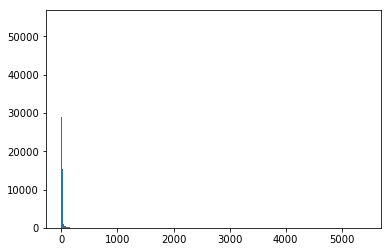

In [31]:
fig, ax = plt.subplots()
ax.hist(merged_data['time_diff'], bins=1000)
plt.show()

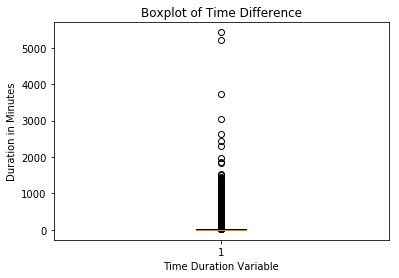

In [32]:
fig, ax = plt.subplots()
ax.boxplot(merged_data['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

In [33]:
print(len(merged_data[merged_data['time_diff'] <= 0]))
merged_data = merged_data[merged_data['time_diff'] > 0]

5


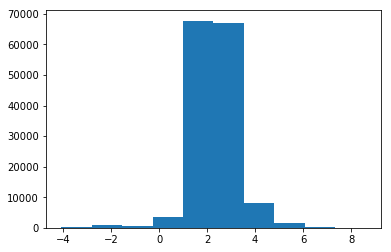

In [34]:
log = np.log(merged_data['time_diff'])

plt.hist(log)
plt.show()

In [35]:
merged_data.to_csv('bikeshare_Q1.csv')